# Practice problems and Solutions on Data Preparation and Analysis 

<h5>Practice Problem - 1 <br><br>1) what if it is time-series problem or categorical or continuous data? <br>2) How to delete data in python? <br>3) How linear regression can be used in this case?<br><br>
Data: Weather.csv</h5>


[16.7601377]
[[0.49327202]]
       Actual  Predicted
0   25.555556  26.351538
1   30.555556  27.447698
2   26.111111  27.721738
3   26.666667  26.625578
4   27.777778  27.995778
5   31.111111  28.269818
6   28.333333  27.721738
7   27.222222  27.447698
8   27.777778  26.899618
9   31.111111  27.721738
10  25.000000  26.899618
11  29.444444  27.721738
12  27.777778  27.721738
13  26.111111  27.721738
14  26.666667  27.721738
15  27.222222  26.351538
16  26.666667  26.899618
17  27.222222  26.351538
18  24.444444  26.899618
19  27.222222  27.995778


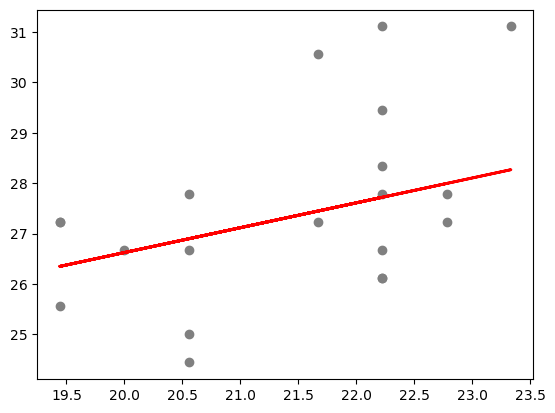

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
dataset = pd.read_csv('Weather.csv')
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


<h5>Practice Problem - 2<br><br>1)what is min-max normalization?<br>2) A set of 10 hypothetical patient records from a large database is presented norm.csv. Patients with a diabetes value of 1 have type-II diabetes and patients with a diabetes value of 0 do not have type-II diabetes.<br><br>   1. Create a new column by normalizing the Weight (kg) variable intothe range 0–1 using the min–max normalization.<br> 2. Create a new column by binning the Weight (kg) variable into threecategories: low (less than 60 kg), medium (60–100 kg), and high (greater than 100 kg).<br>3. Create an aggregated column, body mass index (BMI), which is defined by the formula:BMI =Weight(kg)/(Height(m)) <br><br>
Data : norm.csv
</h5>

In [2]:
import pandas as pd
new=pd.Series([])
new1=pd.Series([])
bmi=pd.Series([])
data = pd.read_csv('norm.csv')
arr=data['Weight']
arr1=data['Height']
minx=min(arr)
maxx=max(arr)
for i in range(len(data)):
    x=(arr[i]-minx)/(maxx-minx)
    new[i]=x
    if(arr[i]<60):
        new1[i]="low"
    elif(arr[i]>100):
        new1[i]="High"
    else:
        new1[i]="Medium"
    y=arr[i]/(arr1[i]*arr1[i])
    bmi=y
data.insert(9,'normalized_Weight',new)
data.insert(10,'bin-interval',new1)
data.insert(11,"BMI",bmi)
print(data)
data.to_csv('norm1.csv')


    Name  Age Gender BloodGroup  Weight  Height  BloodPressure  Bloodpro  \
0    Lee   35      F          A      50    1.52            112      98.7   
1  James   52      M          O     115    1.77            154      98.5   
2  Smith   45      M          O      96    1.83            136      98.8   
3  Patel   70      F          O      41    1.55            125      98.6   
4   Owen   24      M          A      79    1.82            105      98.7   
5  Green   43      M          O     109    1.89            159      98.9   
6   Cook   68      M          A      73    1.76            136      99.0   
7  Hanif   77      F          O     104    1.71            145      98.3   
8   Rice   45      F          O      64    1.74            132      98.6   
9  Marsh   28      M          O     136    1.78            165      98.7   

   Type of Diabeties  normalized_Weight bin-interval        BMI  
0                  0           0.094737          low  42.923873  
1                  1           

C:\Users\hp\AppData\Local\Temp\ipykernel_3580\3545436624.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new=pd.Series([])
C:\Users\hp\AppData\Local\Temp\ipykernel_3580\3545436624.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new1=pd.Series([])
C:\Users\hp\AppData\Local\Temp\ipykernel_3580\3545436624.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bmi=pd.Series([])


<h5>Practice Problem - 3 <br><br>1)Deal With Categorical Data. Convert a categorical (string) input to numerical Labels: Use LableEncoder (), Gender: Male=0
Female=1 on gender_data.csv<br> 2)Convert Numeric bins to number, use mean or mode on age_data.csv <br> 3) Create two new features, One For Lower Bound And Another For Upper Bound For Above data. <br>4)Combine Levels For table zipcode_data.csv. Apply Dummy Coding on data<br><br>

Data :- gender_data.csv, age_data.csv, zipcode_data.csv </h5>


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("gender_data.csv")

number=LabelEncoder()
df['sex']=number.fit_transform(df['sex'].astype('str'))
print('Lable encodeing')
print(df)
dummy = pd.get_dummies(df['sex'])
print('dummy encodeing')
print(dummy)
df1=pd.read_csv("age_data.csv")
df1['Age'] = df1['Age'].str.replace(r'\D', ' ')
df1[['Age_lower','Age_upper']] = df1['Age'].loc[df1['Age'].str.split().str.len() == 2].str.split(expand=True)
df1['Age_lower'] = df1['Age_lower'].astype(dtype=np.int64)
df1['Age_upper'] = df1['Age_upper'].astype(dtype=np.int64)
df1['Age_mean'] = (df1['Age_lower'] + df1['Age_upper'])/2
print('Convert number-bins into numbers')
print(df1)
df2=pd.read_csv("zipcode_data.csv")
df2['zipcode'] = df2['zipcode'].astype(dtype=np.int64)
zipcode = df2['zipcode']
zipcode_ranges = ["[{0} - {1})".format(zipcode, zipcode + 10) for zipcode in range(110004, 110064, 10)]
zipcode_name = ["north delhi", "delhi1", "delhi2", "delhi3","south delhi","west delhi"]
df2['district'] = pd.cut(x=df2['zipcode'], bins=6, labels=zipcode_name)
print('Combining Levels')
print(df2)


Lable encodeing
   sex  pclass
0    1       3
1    0       1
2    0       3
3    0       1
4    1       3
dummy encodeing
   0  1
0  0  1
1  1  0
2  1  0
3  1  0
4  0  1
Convert number-bins into numbers
     Age  Age_lower  Age_upper  Age_mean
0   0 17          0         17       8.5
1   0 17          0         17       8.5
2   0 17          0         17       8.5
3   0 17          0         17       8.5
4  26 35         26         35      30.5
5  46 50         46         50      48.0
6  46 50         46         50      48.0
7  26 35         26         35      30.5
8  26 35         26         35      30.5
Combining Levels
   zipcode     district
0   110044       delhi3
1   110048  south delhi
2   110049  south delhi
3   110006  north delhi
4   110007  north delhi
5   110058   west delhi
6   110059   west delhi
7   110063   west delhi
8   110064   west delhi


C:\Users\hp\AppData\Local\Temp\ipykernel_3580\1685514082.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Age'] = df1['Age'].str.replace(r'\D', ' ')


<h5>Practice Problem - 4 <br><br> Explore the seaborn Library in python. Perform Descriptive Analysis. What is  correlation Coefficient. <br><br>4.1.Create Tabular Correlation Matrix.(corr_coefficient.csv) <br>4.2.How to calculate concordant an discordant pairs?(concordant.csv) <br>4.3.Determine within group ratio?(corr_coefficient.csv) <br>4.4.Determine between group variation?(corr_coefficient.csv) 4.5.Determine F-statistic.(corr_coefficient.csv) 4.6.What is significance of F-statistics?(corr_coefficient.csv)

Data :- corr_coefficient.csv, concordant.csv </h5>

Descriptive Analysis
Descriptive Analysis
                x          y
count   18.000000  18.000000
mean   106.944444   6.405556
std     47.280729   1.860257
min     30.000000   3.000000
25%     71.250000   5.125000
50%    106.500000   6.400000
75%    141.750000   7.725000
max    190.000000  10.000000
Correlation Matrix
          x         y
x  1.000000  0.907561
y  0.907561  1.000000


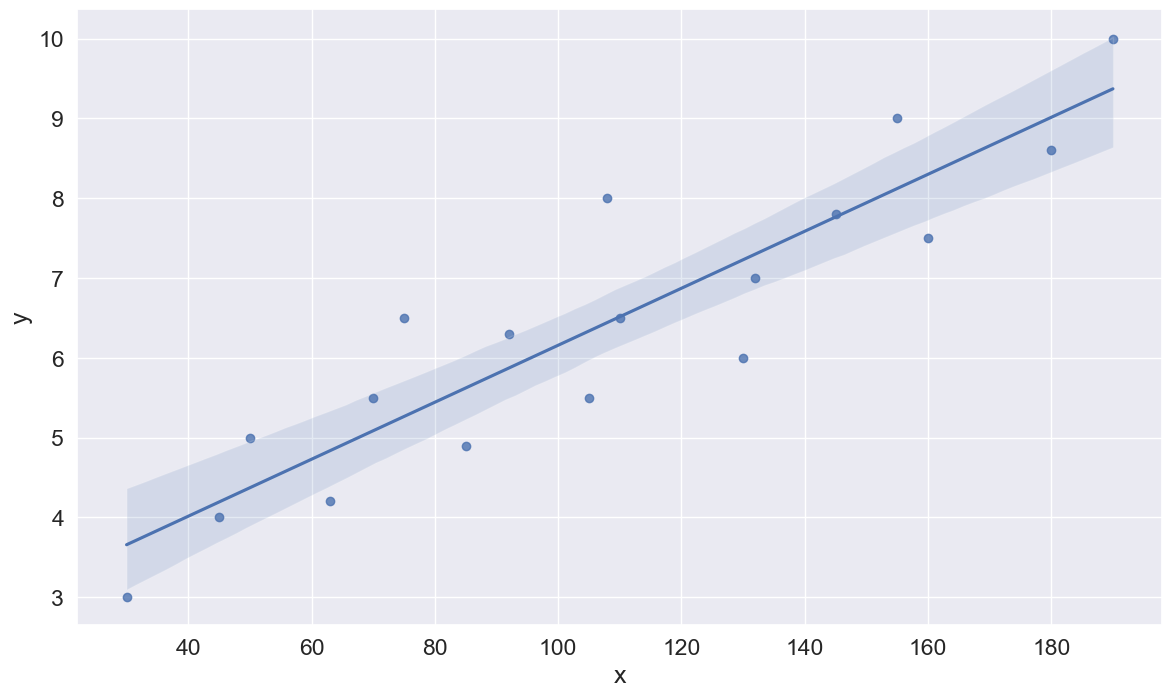

Between group variation
Between group variation
92    -3430554.0
145   -3430554.0
130   -3430554.0
85    -3430554.0
63    -3430554.0
190   -3430554.0
180   -3430554.0
155   -3430554.0
160   -3430554.0
50    -3430554.0
45    -3430554.0
108   -3430554.0
110   -3430554.0
105   -3430554.0
75    -3430554.0
70    -3430554.0
30    -3430554.0
132   -3430554.0
Name: x, dtype: float64
Within group ratio
92    -31200.0
145   -31200.0
130   -31200.0
85    -31200.0
63    -31200.0
190   -31200.0
180   -31200.0
155   -31200.0
160   -31200.0
50    -31200.0
45    -31200.0
108   -31200.0
110   -31200.0
105   -31200.0
75    -31200.0
70    -31200.0
30    -31200.0
132   -31200.0
Name: x, dtype: float64
F-statistic
-3430554.0   NaN
-31200.0     NaN
 30.0        NaN
 45.0        NaN
 50.0        NaN
 63.0        NaN
 70.0        NaN
 75.0        NaN
 85.0        NaN
 92.0        NaN
 105.0       NaN
 108.0       NaN
 110.0       NaN
 130.0       NaN
 132.0       NaN
 145.0       NaN
 155.0       NaN
 160.0  

In [8]:
import numpy as np
from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
data=pd.read_csv('corr_coefficient.csv')
print('Descriptive Analysis')
data.describe()
print('Descriptive Analysis')
print(data.describe())
print('Correlation Matrix')
print(data.corr())
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(14,8)) # set the size of the graph
_ = sns.regplot(data=data, x='x', y='y')
plt.show()
n = data['x'].value_counts()
print('Between group variation')
SSbetween = (sum(data.groupby('y').sum()['x']**2)/n)- ((data['x'].sum()**2)/n)
sum_y_squared = sum([value**2 for value in data['x'].values])
SSwithin = sum_y_squared - sum(data.groupby('y').sum()['x']**2)/n
SStotal = sum_y_squared - (data['x'].sum()**2)/n
DFbetween = SSbetween.value_counts()
DFwithin = SSwithin.value_counts()
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin
F = MSbetween/MSwithin
print('Between group variation')
print(SSbetween)
print('Within group ratio')
print(SSwithin)
print('F-statistic')
print(F)
data2=pd.read_csv('concordant.csv')
conc = 0
disc = 0
i = 0
pairs_tested = 0
x=[1,2,3,4,5,6,7,8,9,10]
y=[2,4,1,3,6,5,7,8,10,9]
for i in range(x.__len__() -1):
    if(x[i] < x[i+1] and y[i] < y[i+1] ) :
        print('concordant Pair :(',x[i],',',x[i+1],') and (',y[i],',',y[i+1],')')
        conc = conc +1
    elif(x[i] > x[i+1] and y[i] > y[i+1] ):
        print('concordant Pair :(', x[i], ',', x[i + 1], ') and (', y[i], ',', y[i + 1], ')')
        conc = conc +1
    else:
        print('discordant Pair :(', x[i], ',', x[i + 1], ') and (', y[i], ',', y[i + 1], ')')
        disc = disc + 1
print("Number of Concordance = ", conc)
print("Number of Discordance = ", disc)


<h5>Practice Problem - 5<br><br>The pizza chain wants to send out targeted coupons to customers. It wants to segment its customers into 4 groups: Large families, small families, single an d college students. Where given data such as size of order, price, frequency, timeoforder, typeofpizza. We have to put each customer into four buckets. You can add your parameters. Perform K-means clustering and hierarchical clustering in python.<br><br>
Data : Pizza.csv
</h5>

K-Means Clustering

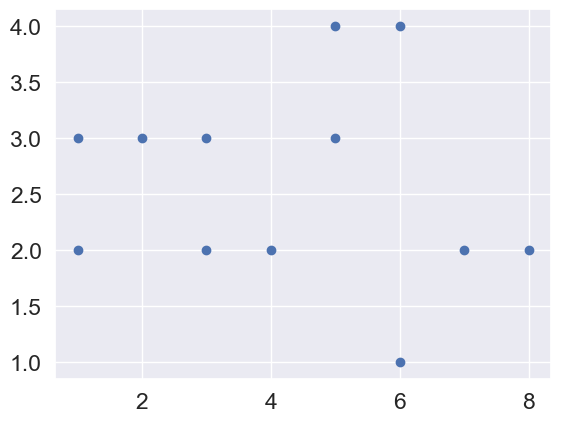

[[1.33333333 2.66666667]
 [7.         1.66666667]
 [5.33333333 3.66666667]
 [3.33333333 2.33333333]]
[1 3 3 2 0 1 3 0 2 0 1 2]
coordinate: [6 1] label: 1
coordinate: [4 2] label: 3
coordinate: [3 3] label: 3
coordinate: [5 3] label: 2
coordinate: [1 2] label: 0
coordinate: [8 2] label: 1
coordinate: [3 2] label: 3
coordinate: [1 3] label: 0
coordinate: [5 4] label: 2
coordinate: [2 3] label: 0
coordinate: [7 2] label: 1
coordinate: [6 4] label: 2


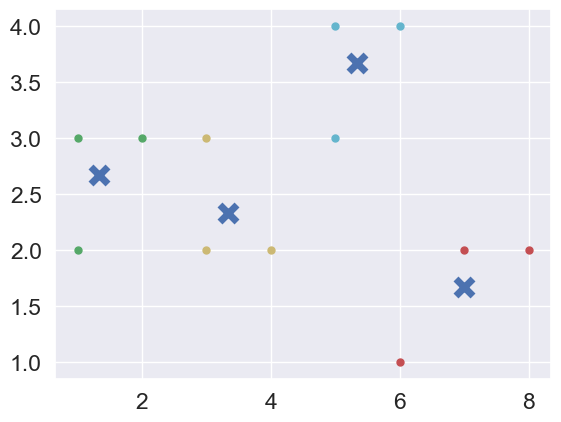

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# create blobs
data = pd.read_csv('pizza.csv')
d1 = data['size_of_order'].values
d2=data['frequence'].values
X = np.array(list(zip(d1,d2)))
#plt.scatter(f1, f2, c='black', s=7)
plt.scatter(d1,d2)
plt.show()
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1],colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()


Heirarchical Clustering

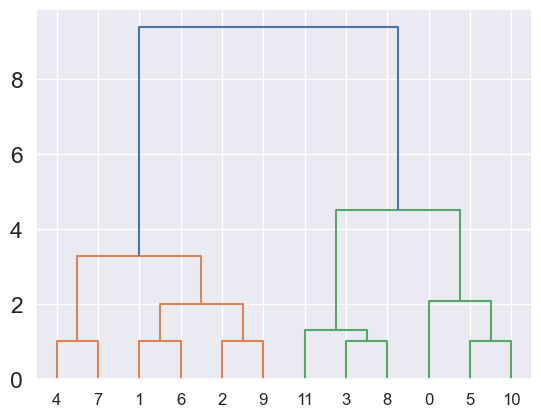

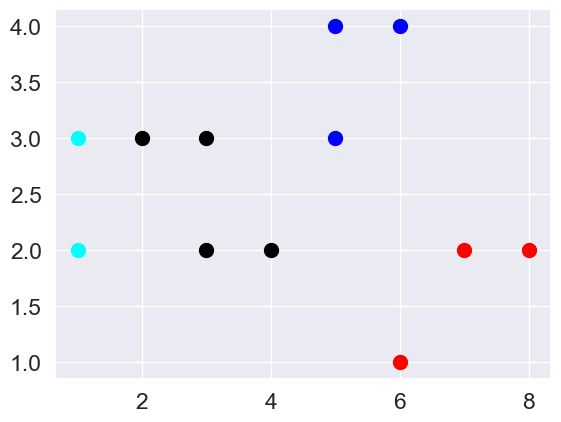

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('pizza.csv')
f1 = data['size_of_order'].values
f2 = data['frequence'].values
x = np.array(list(zip(f1, f2)))
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.show()
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c='red')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=100, c='black')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c='blue')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=100, c='cyan')
plt.show()


<h5>Practice Problem - 6 <br><br>1)How Can You Perform Different Types Of Visualization on time series data	<br>a) line plot <br>b)histogram and density plot <br>c)Box Plot <br>d)scatter plot <br>e)autocorrelation plot <br>f)heatmap<br><br>Data : sales.csv,multi.csv</h5>

Time Series Data

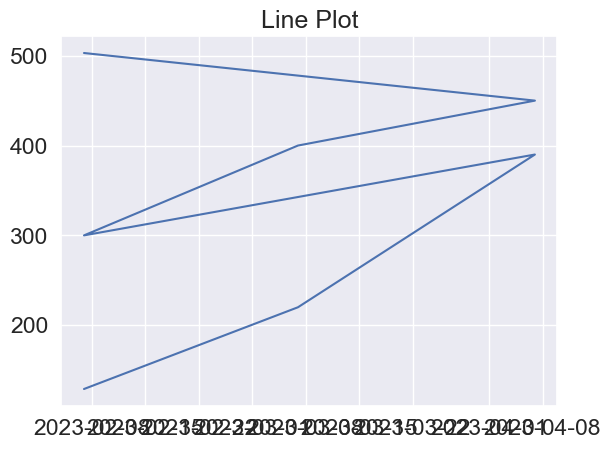

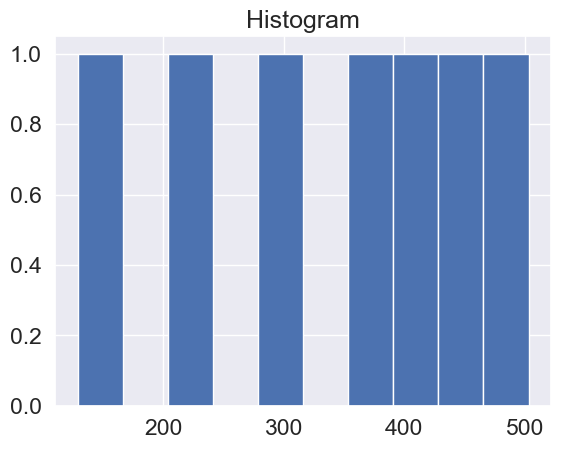

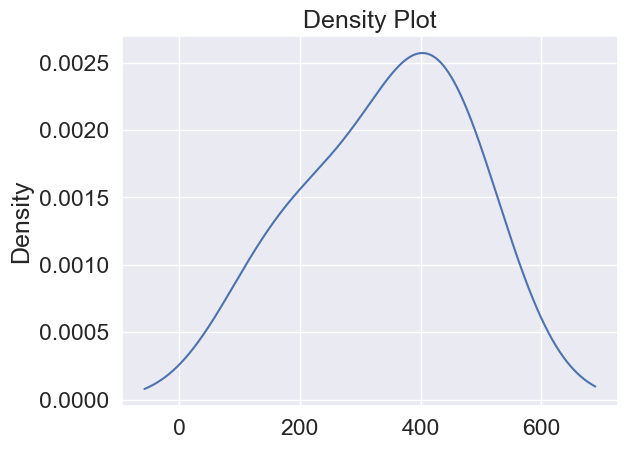

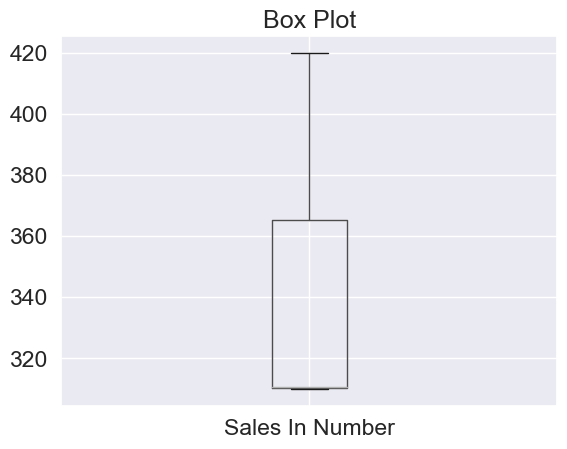

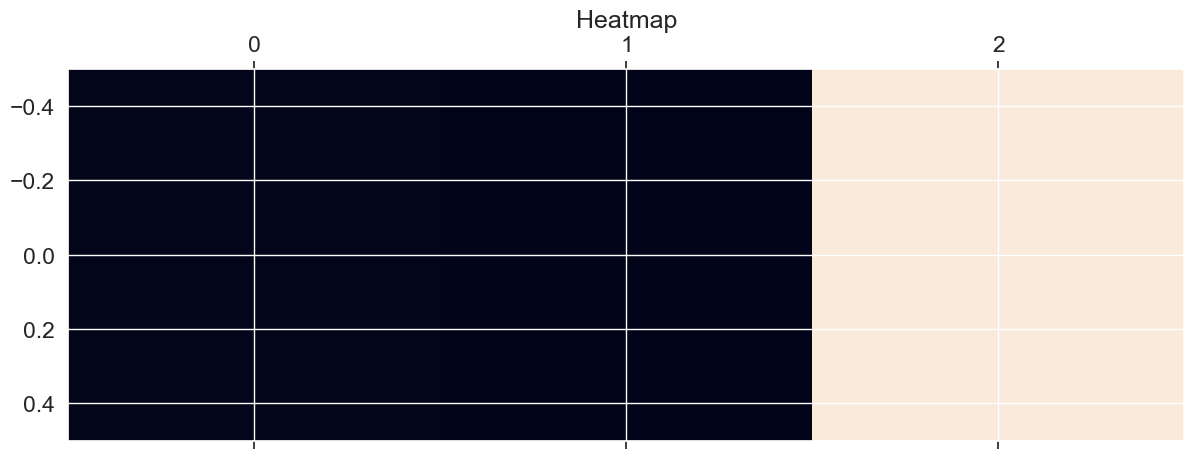

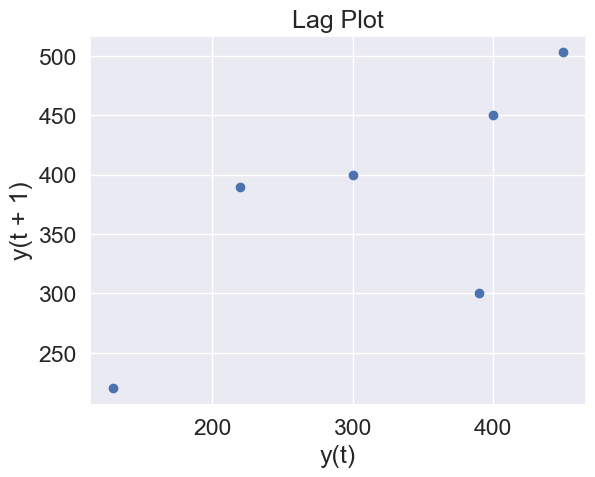

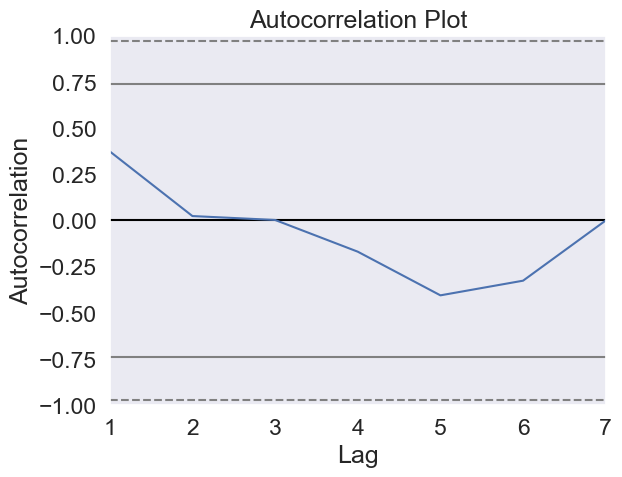

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file and set the Date column as the index
series = pd.read_csv("sales.csv", header=0, parse_dates=['Date'], index_col='Date')

# Line Plot
plt.plot(series)
plt.title('Line Plot')
plt.show()

# Histogram
series.hist()
plt.title('Histogram')
plt.show()

# Density Plot
series['Sales In Number'].plot.density()
plt.title('Density Plot')
plt.show()

# Box Plot
one_year = series.resample('M').mean()
one_year.boxplot()
plt.title('Box Plot')
plt.show()

# Heatmap
months = series.resample('M').mean()
plt.matshow(months.T, interpolation=None, aspect='auto')
plt.title('Heatmap')
plt.show()

# Lag Plot
pd.plotting.lag_plot(series)
plt.title('Lag Plot')
plt.show()

# Autocorrelation Plot
pd.plotting.autocorrelation_plot(series)
plt.title('Autocorrelation Plot')
plt.show()


Multi Dimensional Data

   Time  Temp  Cloud  Dew  Humidity  Wind
0     5    59     97   51        74     8
1     6    59     89   51        75     8
2     7    58     79   51        76     7
3     8    58     74   51        77     7
4     9    60     74   51        74     7
5    10    62     74   52        70     8
6    11    64     76   52        65     8
7    12    66     80   52        60     8
8     1    67     78   52        58    10


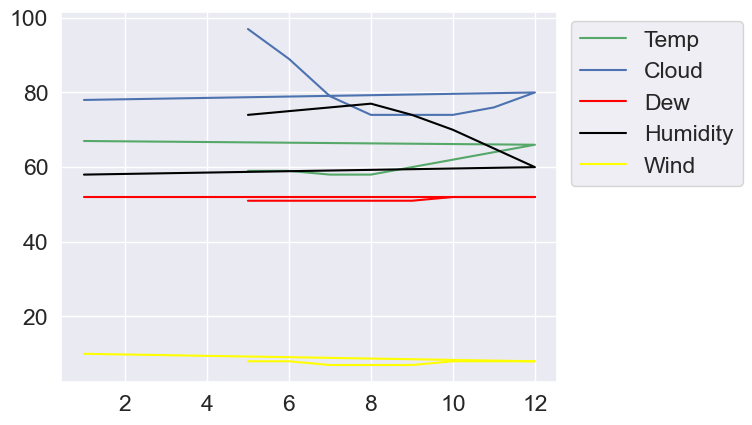

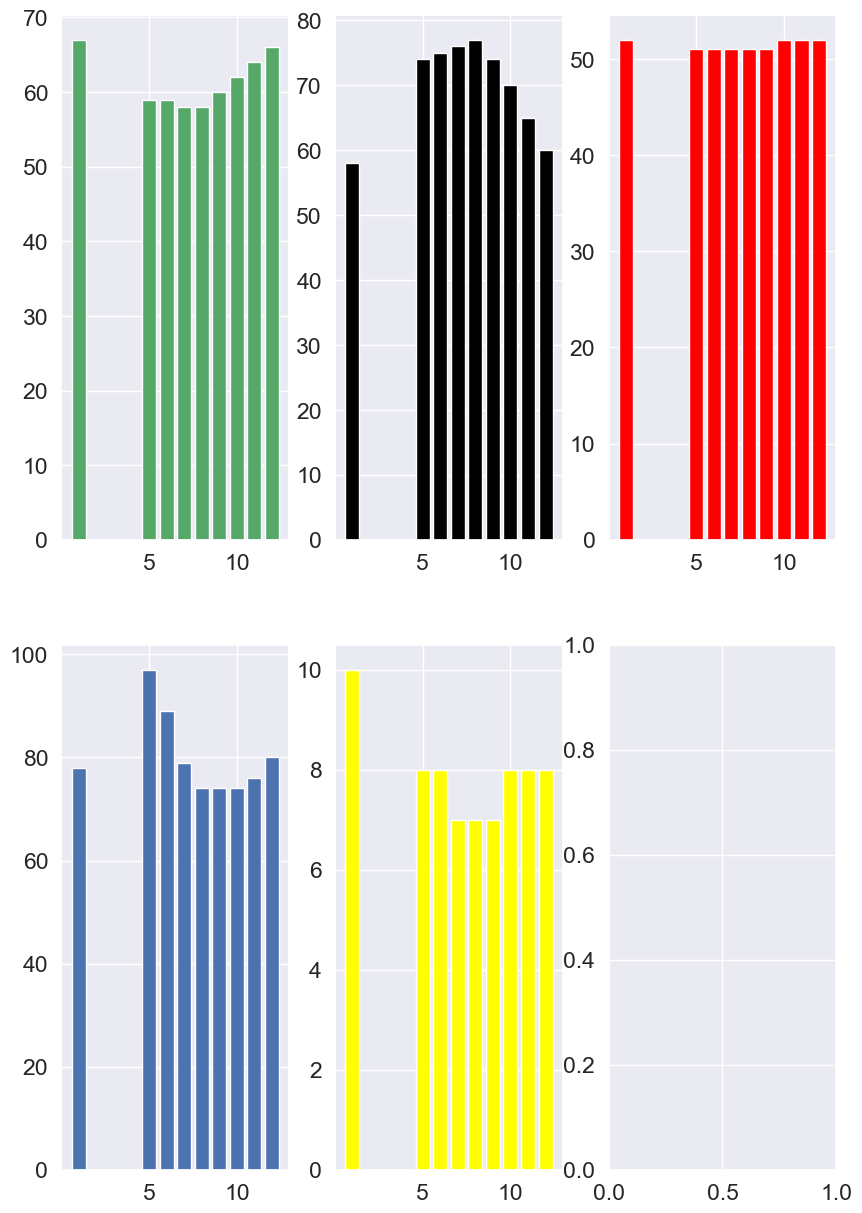

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("multi.csv")
print(df)
df.head()
x=df.Time
plt.plot(x,df.Temp,color='g',label='Temp')
plt.plot(x,df.Cloud,color='b',label='Cloud')
plt.plot(x,df.Dew,color='red',label='Dew')
plt.plot(x,df.Humidity,color='black',label='Humidity')
plt.plot(x,df.Wind,color='yellow',label='Wind')
plt.legend(loc=8,bbox_to_anchor=(1.2, 0.5))
plt.show()
fig, axs = plt.subplots(2, 3, figsize=(10,15))
axs[0, 0].bar(x,df.Temp,color='g')
axs[1, 0].bar(x,df.Cloud,color='b')
axs[0, 1].bar(x,df.Humidity,color='black')
axs[0, 2].bar(x,df.Dew,color='red')
axs[1, 1].bar(x,df.Wind,color='yellow')
plt.show()




